In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-3-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [18]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]

In [19]:
cost_of_living_df[:3]

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,00000,United States,1.0,RPPs: All items,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,00000,United States,2.0,RPPs: Goods,99.3,99.2,99.0,99.0,99.0,99.0,99.0,99.0,99.0,98.9,98.9,98.8
2,00000,United States,3.0,RPPs: Services: Rents,101.1,101.2,102.0,101.9,101.8,101.8,101.7,101.7,101.8,101.8,102.0,102.0


In [20]:
cost_of_living_df = cost_of_living_df[cost_of_living_df.Description == 'RPPs: All items']

In [100]:
cost_of_living_df[np.array([True if "Diego" in i else False for i in cost_of_living_df.GeoName.values])]

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1248,41740,"San Diego-Chula Vista-Carlsbad, CA (Metropolit...",1.0,RPPs: All items,115.1,115.8,118.3,119.5,118.3,117.0,115.8,116.1,116.8,117.9,117.8,117.9


In [34]:
years = np.arange(2008, 2019)

In [101]:
region_ids = ["41860", "35620", "14460", "16980", "38300", "41740"]

In [102]:
relevant_cities = cost_of_living_df[cost_of_living_df.GeoFips.isin(region_ids)].melt(
    id_vars="GeoName",
    value_vars=years.astype(str),
    var_name = 'Year',
    value_name = "RPP"
)
relevant_cities['Year'] = relevant_cities["Year"].astype(float)
relevant_cities['RPP'] = relevant_cities["RPP"].astype(float)

In [103]:
relevant_cities[:5]

,GeoName,Year,RPP
0,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",2008.0,112.1
1,"Chicago-Naperville-Elgin, IL-IN-WI (Metropolit...",2008.0,106.4
2,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",2008.0,120.4
3,"Pittsburgh, PA (Metropolitan Statistical Area)",2008.0,91.5
4,"San Diego-Chula Vista-Carlsbad, CA (Metropolit...",2008.0,115.1


In [110]:
relevant_cities.GeoName.unique()

array(['Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)',
       'Chicago-Naperville-Elgin, IL-IN-WI (Metropolitan Statistical Area)',
       'New York-Newark-Jersey City, NY-NJ-PA (Metropolitan Statistical Area)',
       'Pittsburgh, PA (Metropolitan Statistical Area)',
       'San Diego-Chula Vista-Carlsbad, CA (Metropolitan Statistical Area)',
       'San Francisco-Oakland-Berkeley, CA (Metropolitan Statistical Area)'],
      dtype=object)

In [104]:
cost_of_living_city

array([[106.4, 107.1, 106.8, 106.9, 106.3, 104.5, 103.8, 103.7, 103.5,
        102.9, 102.9]])

In [105]:
import seaborn as sns

In [112]:
pal = sns.color_palette('Set2', 8)
pal

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [179]:
cities = [
    "Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)",
    'New York-Newark-Jersey City, NY-NJ-PA (Metropolitan Statistical Area)',
    'San Diego-Chula Vista-Carlsbad, CA (Metropolitan Statistical Area)',
    'San Francisco-Oakland-Berkeley, CA (Metropolitan Statistical Area)',
    'Chicago-Naperville-Elgin, IL-IN-WI (Metropolitan Statistical Area)',
    'Pittsburgh, PA (Metropolitan Statistical Area)',
]
city_color_df = {city: p for city, p in zip(cities, pal)}

(1984.0, 2020.0)

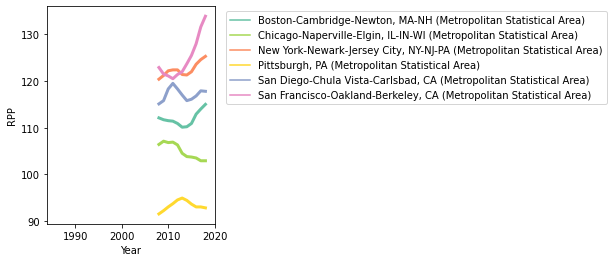

In [180]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=relevant_cities, x="Year", y="RPP", hue="GeoName", ax=ax, palette=city_color_df,
    lw=3
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])

In [181]:
all_dfs = []
for city in ["boston", 'new-york', 'san-diego', 'san-francisco', 'us-average', 'chicago', 'pittsburgh']:
    city_df = pd.read_csv(DATA_DIR / 'CPI' / '{}-all-items.csv'.format(city))
    city_df['CITY'] = city
    city_df['CPI'] = city_df['Value']
    all_dfs.append(city_df)
CPI_all_df_stacked = pd.concat(all_dfs)
CPI_all_df = CPI_all_df_stacked[['Year', 'CPI', 'CITY']].groupby(['Year', 'CITY']).describe()[['CPI']]['CPI']['mean']
CPI_all_df = pd.DataFrame(CPI_all_df).reset_index()
CPI_all_df = CPI_all_df.pivot(index="Year", columns = 'CITY', values='mean')
CPI_all_df[:3]

CITY,boston,chicago,new-york,pittsburgh,san-diego,san-francisco,us-average
Year,,,,,,,
1984,104.70,103.80,104.80,104.55,104.75,104.00,103.883333
1985,109.40,107.75,108.70,106.90,110.35,108.35,107.566667
1986,112.25,110.00,112.25,108.25,113.50,111.65,109.608333


In [182]:
CPI_relative_average = pd.DataFrame(CPI_all_df.values.T - CPI_all_df['us-average'].values).T
CPI_relative_average.columns = CPI_all_df.columns
CPI_relative_average.index = CPI_all_df.index
CPI_relative_average= CPI_relative_average.reset_index()
CPI_relative_average[:3]

CITY,Year,boston,chicago,new-york,pittsburgh,san-diego,san-francisco,us-average
0,1984,0.816667,-0.083333,0.916667,0.666667,0.866667,0.116667,0.0
1,1985,1.833333,0.183333,1.133333,-0.666667,2.783333,0.783333,0.0
2,1986,2.641667,0.391667,2.641667,-1.358333,3.891667,2.041667,0.0


In [183]:
cities_df = {
    "boston":"Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)",
    "new-york":'New York-Newark-Jersey City, NY-NJ-PA (Metropolitan Statistical Area)',
    "san-diego":'San Diego-Chula Vista-Carlsbad, CA (Metropolitan Statistical Area)',
    "san-francisco":'San Francisco-Oakland-Berkeley, CA (Metropolitan Statistical Area)',
    "chicago":'Chicago-Naperville-Elgin, IL-IN-WI (Metropolitan Statistical Area)',
    "pittsburgh":'Pittsburgh, PA (Metropolitan Statistical Area)',
}

In [186]:
cities_short = ["boston", "new-york", "san-diego", "san-francisco", "chicago", "pittsburgh"]

CPI_rel_average_stacked = CPI_relative_average.melt(id_vars = "Year", value_vars = cities_short, value_name="CPI")
CPI_rel_average_stacked['GeoName'] = [cities_df[row.CITY] for idx, row in CPI_rel_average_stacked.iterrows()]
CPI_rel_average_stacked[:3]

,Year,CITY,CPI,GeoName
0,1984,boston,0.816667,"Boston-Cambridge-Newton, MA-NH (Metropolitan S..."
1,1985,boston,1.833333,"Boston-Cambridge-Newton, MA-NH (Metropolitan S..."
2,1986,boston,2.641667,"Boston-Cambridge-Newton, MA-NH (Metropolitan S..."


In [187]:
CPI_RPP_merged = CPI_rel_average_stacked.merge(relevant_cities, on=["GeoName", 'Year'])

In [188]:
CPI_RPP_merged[:3]

,Year,CITY,CPI,GeoName,RPP
0,2008,boston,20.0680,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",112.1
1,2009,boston,19.2410,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",111.7
2,2010,boston,19.3905,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",111.5


In [189]:
CPI_RPP_merged[CPI_RPP_merged.CITY=='new-york']

,Year,CITY,CPI,GeoName,RPP
11,2008,new-york,20.480000,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",120.4
12,2009,new-york,22.287500,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",121.2
13,2010,new-york,22.808500,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",122.2
14,2011,new-york,22.778333,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",122.4
15,2012,new-york,22.994083,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",122.4
16,2013,new-york,23.876417,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",121.4
17,2014,new-york,23.493333,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",121.3
18,2015,new-york,23.541500,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",122.0
19,2016,new-york,23.357833,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",123.6
20,2017,new-york,23.400917,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",124.6


In [221]:
### Is it possible to estimate RPP for pre-2008 using CPI

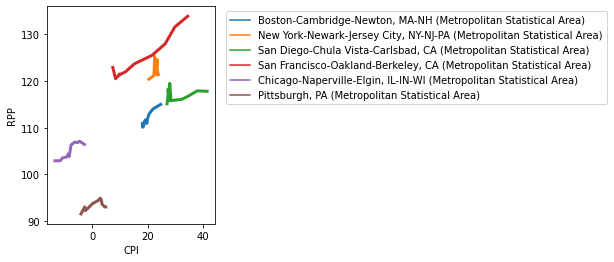

In [222]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=CPI_RPP_merged, x="CPI", y="RPP", hue="GeoName", ax=ax,
    lw=3
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

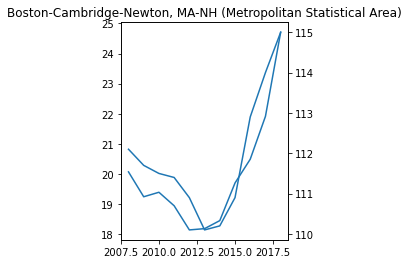

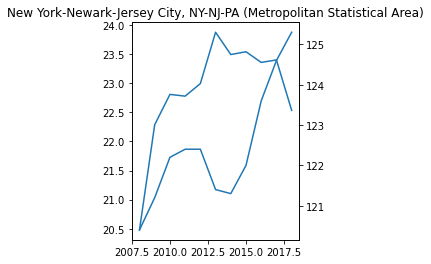

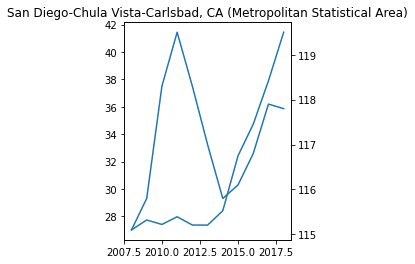

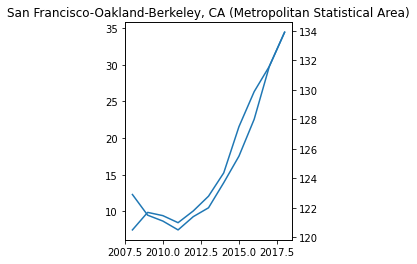

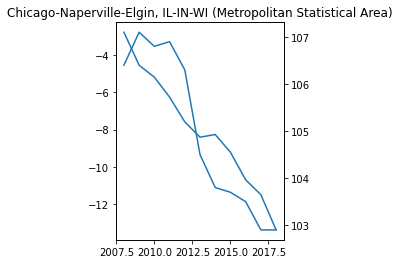

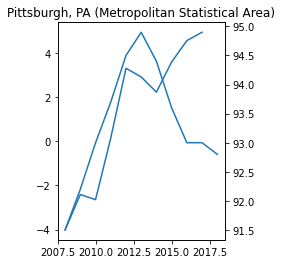

In [223]:
for city in cities:
    city_df = CPI_RPP_merged[CPI_RPP_merged.GeoName == city]
    fig, ax = plt.subplots(figsize=(3, 4))
    ax.plot(
        city_df.Year,
        city_df.CPI,
    )
    ax2 = ax.twinx()  #
    ax2.plot(
        city_df.Year,
        city_df.RPP,
    )
    ax.set_title(city)
    plt.show()

In [224]:
### For each, fit a linear model to 

In [225]:
for city in cities:
    city_df = CPI_RPP_merged[CPI_RPP_merged.GeoName == city]
    x = city_df.CPI.values
    y = city_df.RPP.values
    m = (np.isnan(x) | np.isnan(y)) == False
    x = x[m]
    y = y[m]
    m, b = np.polyfit(x, y, 1)
    estimated_RPP = CPI_rel_average_stacked[CPI_rel_average_stacked.GeoName == city].CPI.values*m+b
    CPI_rel_average_stacked.loc[CPI_rel_average_stacked.GeoName == city, 'estimated_RPP'] = estimated_RPP

In [226]:
CPI_rel_average_stacked

,Year,CITY,CPI,GeoName,estimated_RPP
0,1984,boston,0.816667,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",97.504687
1,1985,boston,1.833333,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",98.269468
2,1986,boston,2.641667,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",98.877531
3,1987,boston,3.525000,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",99.542013
4,1988,boston,5.891667,"Boston-Cambridge-Newton, MA-NH (Metropolitan S...",101.322322
...,...,...,...,...,...
223,2017,pittsburgh,4.930417,"Pittsburgh, PA (Metropolitan Statistical Area)",94.112705
224,2018,pittsburgh,NaN,"Pittsburgh, PA (Metropolitan Statistical Area)",NaN
225,2019,pittsburgh,NaN,"Pittsburgh, PA (Metropolitan Statistical Area)",NaN
226,2020,pittsburgh,NaN,"Pittsburgh, PA (Metropolitan Statistical Area)",NaN


(1984.0, 2020.0)

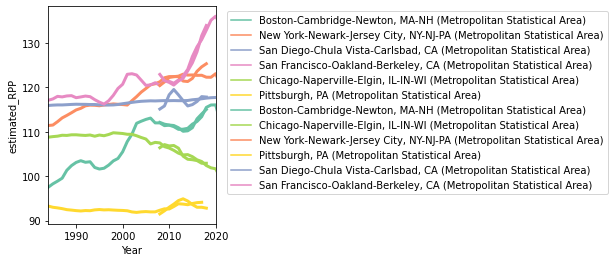

In [227]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=CPI_rel_average_stacked, x="Year", y="estimated_RPP", hue="GeoName", ax=ax, palette=city_color_df,
    lw=3
)
sns.lineplot(
    data=relevant_cities, x="Year", y="RPP", hue="GeoName", ax=ax, palette=city_color_df,
    lw=3
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])